In [ ]:
import pandas as pd
import numpy as np
# Load the dataset
LACrimedf = pd.read_csv('/content/Crime_Data_from_2020_to_Present (2).csv')
LACrimedf

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230.0,3.0,Southwest,377.0,2.0,624.0,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330.0,1.0,Central,163.0,2.0,624.0,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200.0,1.0,Central,155.0,2.0,845.0,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730.0,15.0,N Hollywood,1543.0,2.0,745.0,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415.0,19.0,Mission,1998.0,2.0,740.0,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623505,220811992,06/10/2022 12:00:00 AM,06/01/2022 12:00:00 AM,1830.0,8.0,West LA,839.0,1.0,440.0,THEFT PLAIN - PETTY ($950 & UNDER),...,IC,Invest Cont,440.0,NaN,NaN,NaN,10200 SANTA MONICA BL,NaN,34.0611,-118.4184
623506,221911104,06/22/2022 12:00:00 AM,06/13/2022 12:00:00 AM,1300.0,19.0,Mission,1969.0,1.0,420.0,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,13300 WINGO ST,NaN,34.2422,-118.4235
623507,221115298,10/19/2022 12:00:00 AM,10/18/2022 12:00:00 AM,930.0,11.0,Northeast,1142.0,1.0,420.0,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4500 FRANKLIN AV,NaN,34.1054,-118.2874
623508,220117507,08/03/2022 12:00:00 AM,08/03/2022 12:00:00 AM,1120.0,1.0,Central,165.0,1.0,236.0,INTIMATE PARTNER - AGGRAVATED ASSAULT,...,AO,Adult Other,236.0,998.0,NaN,NaN,600 WALL ST,NaN,34.0433,-118.2488


In [ ]:
# Remove all unwanted columns, we won't be using any of these 
# This also helps remove some NaN values
LACrimedf1 = LACrimedf.drop(columns = ['DR_NO', 'TIME OCC', 'Rpt Dist No', 'Part 1-2'])
LACrimedf2 = LACrimedf1.drop(columns = ['Crm Cd', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4'])
LACrimedf3 = LACrimedf2.drop(columns = ['Mocodes', 'Premis Cd', 'Weapon Used Cd', 'Weapon Desc', 'LOCATION', 'Cross Street'])
LACrimedf4 = LACrimedf3.drop(columns = ['AREA', 'LAT', 'LON', 'Premis Desc', 'Status', 'Status Desc'])
LACrimedf4

,Date Rptd,DATE OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent
0,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,Southwest,BATTERY - SIMPLE ASSAULT,36.0,F,B
1,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,Central,BATTERY - SIMPLE ASSAULT,25.0,M,H
2,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0.0,X,X
3,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76.0,F,W
4,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31.0,X,X
...,...,...,...,...,...,...,...
623505,06/10/2022 12:00:00 AM,06/01/2022 12:00:00 AM,West LA,THEFT PLAIN - PETTY ($950 & UNDER),0.0,X,X
623506,06/22/2022 12:00:00 AM,06/13/2022 12:00:00 AM,Mission,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0.0,NaN,NaN
623507,10/19/2022 12:00:00 AM,10/18/2022 12:00:00 AM,Northeast,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),24.0,F,H
623508,08/03/2022 12:00:00 AM,08/03/2022 12:00:00 AM,Central,INTIMATE PARTNER - AGGRAVATED ASSAULT,40.0,M,H


In [ ]:
# Already large dataset, remove all rows with NaN values
LACrimedf5 = LACrimedf4.dropna().reset_index(drop=True)
LACrimedf5

,Date Rptd,DATE OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent
0,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,Southwest,BATTERY - SIMPLE ASSAULT,36.0,F,B
1,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,Central,BATTERY - SIMPLE ASSAULT,25.0,M,H
2,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0.0,X,X
3,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76.0,F,W
4,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31.0,X,X
...,...,...,...,...,...,...,...
541887,03/17/2022 12:00:00 AM,03/17/2022 12:00:00 AM,N Hollywood,THEFT PLAIN - PETTY ($950 & UNDER),0.0,M,O
541888,02/17/2022 12:00:00 AM,02/17/2022 12:00:00 AM,Rampart,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",28.0,M,B
541889,06/10/2022 12:00:00 AM,06/01/2022 12:00:00 AM,West LA,THEFT PLAIN - PETTY ($950 & UNDER),0.0,X,X
541890,10/19/2022 12:00:00 AM,10/18/2022 12:00:00 AM,Northeast,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),24.0,F,H


In [ ]:
# Convert dates to datetime datatypes for Time Series Analysis later
LACrimedf5.dtypes
LACrimedf5["Date Rptd"] = LACrimedf4["Date Rptd"].astype("datetime64[ns]")
LACrimedf5["DATE OCC"] = LACrimedf4["Date Rptd"].astype("datetime64[ns]")
LACrimedf5.dtypes

Date Rptd       datetime64[ns]
DATE OCC        datetime64[ns]
AREA NAME               object
Crm Cd Desc             object
Vict Age               float64
Vict Sex                object
Vict Descent            object
dtype: object

In [ ]:
# Create a new column for the victim's birth year using Age
def age(x):
   return 2023-x
LACrimedf5["Vict Birth Year"] = LACrimedf5["Vict Age"].apply(age)
LACrimedf5

,Date Rptd,DATE OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Vict Birth Year
0,2020-01-08,2020-01-08,Southwest,BATTERY - SIMPLE ASSAULT,36.0,F,B,1987.0
1,2020-01-02,2020-01-02,Central,BATTERY - SIMPLE ASSAULT,25.0,M,H,1998.0
2,2020-04-14,2020-04-14,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0.0,X,X,2023.0
3,2020-01-01,2020-01-01,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76.0,F,W,1947.0
4,2020-01-01,2020-01-01,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31.0,X,X,1992.0
...,...,...,...,...,...,...,...,...
541887,2022-11-09,2022-11-09,N Hollywood,THEFT PLAIN - PETTY ($950 & UNDER),0.0,M,O,2023.0
541888,2022-11-25,2022-11-25,Rampart,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",28.0,M,B,1995.0
541889,2022-10-31,2022-10-31,West LA,THEFT PLAIN - PETTY ($950 & UNDER),0.0,X,X,2023.0
541890,2022-10-31,2022-10-31,Northeast,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),24.0,F,H,1999.0


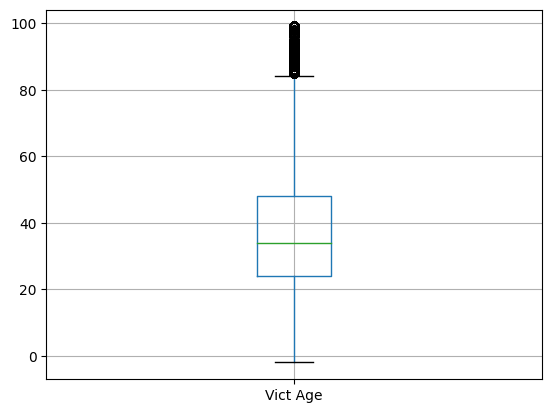

In [ ]:
import matplotlib.pyplot as plt
Age_bplt = LACrimedf5.boxplot(column = ['Vict Age'])
Age_bplt.plot()
plt.show() #We have outliers in Vict Age!

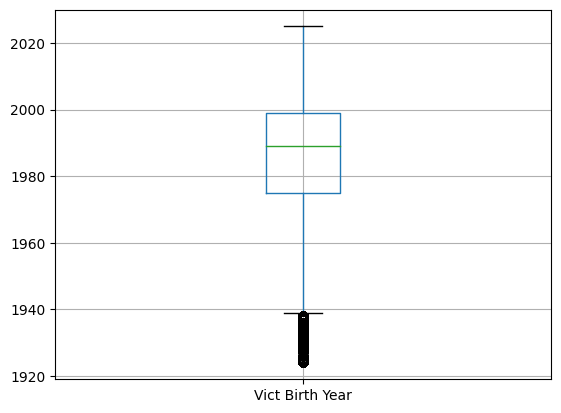

In [ ]:
BYear_bplt = LACrimedf5.boxplot(column = ['Vict Birth Year'])
BYear_bplt.plot()
plt.show() #We have outliers in Vict Birth Year!

In [ ]:
# To get rid of the rows with outliers we found in the birthyear and age columns, I looked at the boxplots we created and estimated where the upper 
# and lower fences were. I then dropped any rows where the value of age was more than the upper fence (estimate:81) and where the value of birthyear was
# less than the lower fence (estimate:1940)
LACrimedf5.drop(LACrimedf5[LACrimedf5['Vict Age'] > 81].index, inplace = True)
LACrimedf5.drop(LACrimedf5[LACrimedf5['Vict Birth Year'] < 1940].index, inplace = True)

In [ ]:
# Check to see if we have invalid birth years or ages (We do!)
print(any(LACrimedf5['Vict Birth Year'] >= 2023))
print(any(LACrimedf5['Vict Age'] <= 0))

# Drop all rows with invalid ages and birth years
LACrimedf5.drop(LACrimedf5[LACrimedf5['Vict Age'] <= 0].index, inplace = True)
LACrimedf5.drop(LACrimedf5[LACrimedf5['Vict Birth Year'] >= 2023].index, inplace = True)

True
True


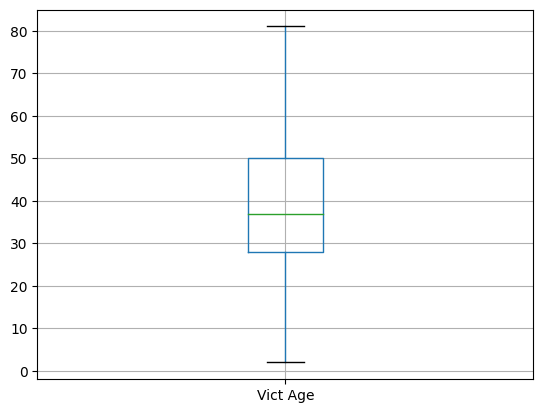

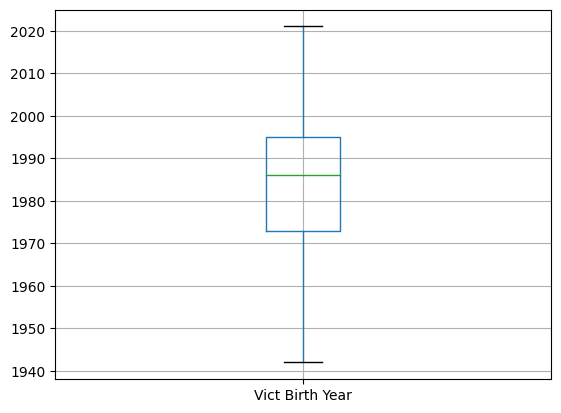

In [ ]:
# I ran my boxplots again to see if I had any more outliers
Age_bplt = LACrimedf5.boxplot(column = ['Vict Age'])
Age_bplt.plot()
plt.show()

BYear_bplt = LACrimedf5.boxplot(column = ['Vict Birth Year'])
BYear_bplt.plot()
plt.show()

In [ ]:
# MY FINAL CLEANED DATASET
LACrimedf5 = LACrimedf5.reset_index(drop = True) #resets the index number
LACrimedf5

,Date Rptd,DATE OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Vict Birth Year
0,2020-01-08,2020-01-08,Southwest,BATTERY - SIMPLE ASSAULT,36.0,F,B,1987.0
1,2020-01-02,2020-01-02,Central,BATTERY - SIMPLE ASSAULT,25.0,M,H,1998.0
2,2020-01-01,2020-01-01,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76.0,F,W,1947.0
3,2020-01-01,2020-01-01,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31.0,X,X,1992.0
4,2020-01-02,2020-01-02,Central,"RAPE, FORCIBLE",25.0,F,H,1998.0
...,...,...,...,...,...,...,...,...
469220,2022-08-23,2022-08-23,Olympic,EXTORTION,23.0,F,H,2000.0
469221,2022-06-03,2022-06-03,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",52.0,F,B,1971.0
469222,2022-11-25,2022-11-25,Rampart,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",28.0,M,B,1995.0
469223,2022-10-31,2022-10-31,Northeast,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),24.0,F,H,1999.0


In [ ]:
# Area Name, Crm Cd Desc, Vict Descent, and Vict Birth Year are Nominal variables so mode is the central tendency
print(LACrimedf5['AREA NAME'].mode()) #Central
print(LACrimedf5['Crm Cd Desc'].mode()) #BATTERY - SIMPLE ASSAULT
print(LACrimedf5['Vict Sex'].mode()) #M
print(LACrimedf5['Vict Descent'].mode()) #H

0    Central
Name: AREA NAME, dtype: object
0    BATTERY - SIMPLE ASSAULT
Name: Crm Cd Desc, dtype: object
0    M
Name: Vict Sex, dtype: object
0    H
Name: Vict Descent, dtype: object


In [ ]:
# Date Rptd, Date OCC, Vict Age, and Vict Birth Year are Interval variables so mean is the central tendency
print("The mean for Date Rptd is", LACrimedf5['Date Rptd'].mean())
print("The mean for DATE OCC is", LACrimedf5['DATE OCC'].mean())
print("The mean for Vict Age is", LACrimedf5['Vict Age'].mean())
print("The mean for Vict Birth Year is", LACrimedf5['Vict Birth Year'].mean())

The mean for Date Rptd is 2021-05-30 17:32:18.794394624
The mean for DATE OCC is 2021-05-30 17:32:18.794394624
The mean for Vict Age is 39.193190899888116
The mean for Vict Birth Year is 1983.8068091001119


In [ ]:
# Area Name, Crm Cd Desc, Vict Descent, and Vict Birth Year are Nominal variables so the variation ratio is the measure of dispersion
ANFreqTable = LACrimedf5['AREA NAME'].value_counts() #calculates the frequency of each value in the column
ANFreq = ANFreqTable.values #gives an array of all of our frequencies
ANMode = ANFreq.max() #we found the mode previously, but this returns the max frequency which is the modal category
n1 = ANFreq.sum() #stores the sum of all the frequencies that were found from the column
pANMode = ANMode/n1 #to find the proportion of the modal category, we divide the frequency by the sum
ANVR = 1 - pANMode #finally, we subtract our value from 1
print("Variation ratio for AREA NAME is", ANVR)

CCDFreqTable = LACrimedf5['Crm Cd Desc'].value_counts() #same as before
CCDFreq = CCDFreqTable.values
CCDMode = CCDFreq.max()
n2 = CCDFreq.sum()
pCCDMode = CCDMode/n2
CCDVR = 1 - pCCDMode
print("Variation ratio for Crm Cd Desc is", CCDVR)

VSFreqTable = LACrimedf5['Vict Sex'].value_counts() #same as before
VSFreq = VSFreqTable.values
VSMode = VSFreq.max()
n3 = VSFreq.sum()
pVSMode = VSMode/n3
VSVR = 1 - pVSMode
print("Variation ratio for Vict Sex is", VSVR)

VDFreqTable = LACrimedf5['Vict Descent'].value_counts() #same as before
VDFreq = VDFreqTable.values
VDMode = VDFreq.max()
n4 = VDFreq.sum()
pVDMode = VDMode/n4
VDVR = 1 - pVDMode
print("Variation ratio for Vict Descent is", VDVR)

Variation ratio for AREA NAME is 0.930879641962811
Variation ratio for Crm Cd Desc is 0.8970920134263946
Variation ratio for Vict Sex is 0.49290425701955354
Variation ratio for Vict Descent is 0.5996206510735788


In [ ]:
# Date Rptd, Date OCC, Vict Age, and Vict Birth Year are Interval variables so standard deviation is the measure of dispersion
print("\nThe standard deviation for Date Rptd is", LACrimedf5['Date Rptd'].std())
print("The standard deviation for DATE OCC is", LACrimedf5['DATE OCC'].std())
print("The standard deviation for Vict Age is", LACrimedf5['Vict Age'].std())
print("The standard deviation for Vict Birth Year is", LACrimedf5['Vict Birth Year'].std())


The standard deviation for Date Rptd is 304 days 12:19:11.248623188
The standard deviation for DATE OCC is 304 days 12:19:11.248623188
The standard deviation for Vict Age is 14.969841587507144
The standard deviation for Vict Birth Year is 14.969841587507146


In [ ]:
# builds a correlation matrix and shows that victim age and birth year have a strong relationship, which makes sense
corr_matrix = LACrimedf5.corr().abs()
corr_matrix

<ipython-input-16-0bc463d14080>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = LACrimedf5.corr().abs()


,Vict Age,Vict Birth Year
Vict Age,1.0,1.0
Vict Birth Year,1.0,1.0


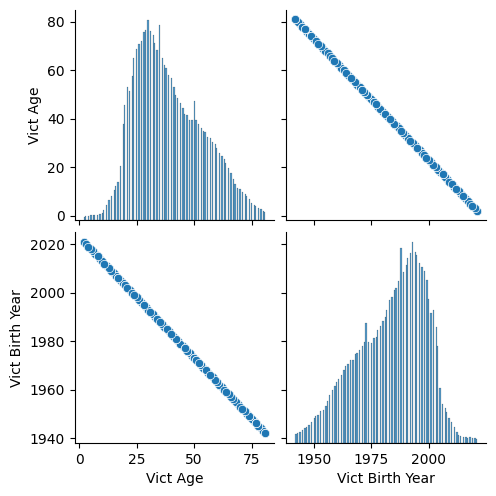

In [ ]:
import seaborn as sns
sns.pairplot(LACrimedf5)
plt.show()

In [ ]:
LACrimedf5.describe() # Gives count, mean, standard deviation, minimum, Q1, median, Q3, and maximum for victim birth year and victim age

,Vict Age,Vict Birth Year
count,469225.000000,469225.000000
mean,39.193191,1983.806809
std,14.969842,14.969842
min,2.000000,1942.000000
25%,28.000000,1973.000000
50%,37.000000,1986.000000
75%,50.000000,1995.000000
max,81.000000,2021.000000


Text(0, 0.5, 'Frequency')

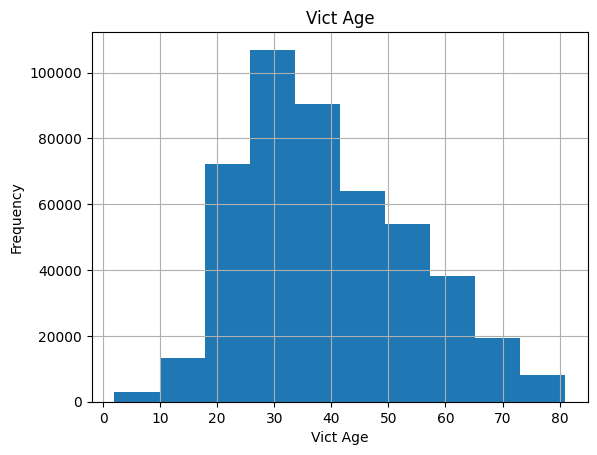

In [ ]:
# One of our hypothesises was that young adults will be the most frequent victim for crime in LA
# We plot a histogram to see to which ages were the most frequent:
LACrimedf5.hist(column='Vict Age')
plt.xlabel("Vict Age")
plt.ylabel("Frequency")
# We can see that people in their late 30's seem to be the most frequent ages of victims for crime in LA.

<Axes: >

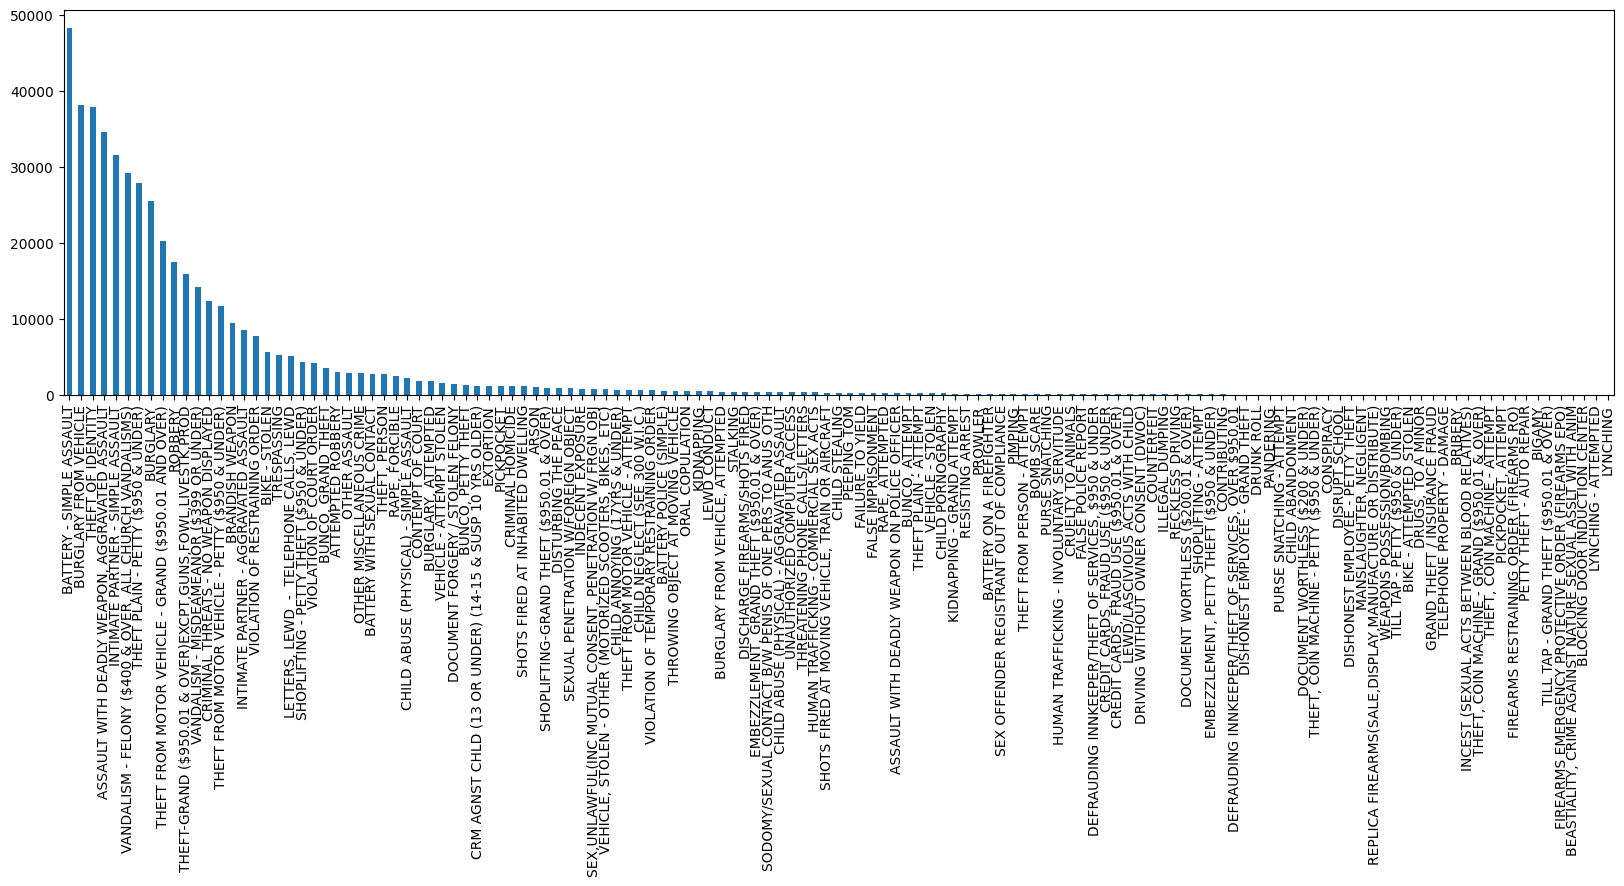

In [ ]:
# Another hypothesis we had was that robberies and sexual assault would be the most frequent crimes in LA
# We plotted a barplot for the Crm Cd Desc variable to which crimes were the most frequent
plt.figure(figsize=(20, 5))
LACrimedf5['Crm Cd Desc'].value_counts().plot(kind='bar')
# We can see that Battery - Simple Assault and Identity Theft were the most frequent crimes in LA

In [ ]:
MLdf = LACrimedf5.loc[LACrimedf5['Crm Cd Desc'] == 'BATTERY - SIMPLE ASSAULT'] # new df where the crime was only burglarly
#MLdf = MLdf.loc[LACrimedf5['DATE OCC'] < "2021-01-01"] #filter data when it falls off
# group by date and count the frequency
MLdf1 = MLdf.groupby('DATE OCC').count().reset_index()

# rename the count column
MLdf1 = MLdf1.rename(columns={'Crm Cd Desc': 'Frequency of Battery'})
MLdf2 = MLdf1.drop(columns = ['Date Rptd', 'AREA NAME', 'Vict Age',	'Vict Sex',	'Vict Descent',	'Vict Birth Year'])
MLdf2

#MLdf1 = MLdf.groupby(["DATE OCC"])["Crm Cd Desc"].count().reset_index(name="Number of Shoplifting Instances") #new df that gives 2 columns - the date and how many burglaries

#MLdf1.plot(x = "DATE OCC", y = "Number of Shoplifting Instances")

,DATE OCC,Frequency of Battery
0,2020-01-01,42
1,2020-01-02,38
2,2020-01-03,39
3,2020-01-04,43
4,2020-01-05,39
...,...,...
1150,2023-02-28,3
1151,2023-03-01,3
1152,2023-03-04,1
1153,2023-03-05,1


In [ ]:
df = MLdf2.copy()
#df = df.rename(columns={'Number of Shoplifting Instances':'y'})
#df['DATE OCC']= to_datetime(df['DATE OCC'])
#df = df.rename(columns = {'DATE OCC': 'ds'})
#df.rename(columns = {'DATE OCC':'ds'}, inplace = True)
#df.rename(columns = {'Number of Shoplifting Instances':'y'}, inplace = True)
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])
df

,ds,y
0,2020-01-01,42
1,2020-01-02,38
2,2020-01-03,39
3,2020-01-04,43
4,2020-01-05,39
...,...,...
1150,2023-02-28,3
1151,2023-03-01,3
1152,2023-03-04,1
1153,2023-03-05,1


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnuf4vv_v/6yzat5bi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnuf4vv_v/gvvluc1d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17918', 'data', 'file=/tmp/tmpnuf4vv_v/6yzat5bi.json', 'init=/tmp/tmpnuf4vv_v/gvvluc1d.json', 'output', 'file=/tmp/tmpnuf4vv_v/prophet_modelannsh6sc/prophet_model-20230427042354.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:23:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:23:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


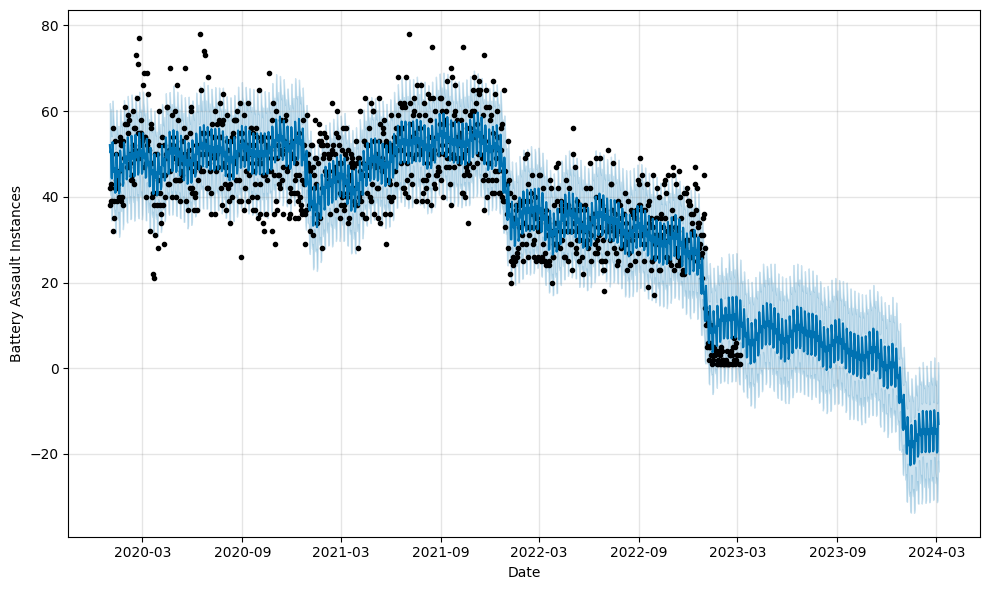

In [ ]:
from pandas import to_datetime
from prophet import Prophet

# define the model
model = Prophet()
# fit the model
model.fit(df)

future = model.make_future_dataframe(periods=365)
#future.tail()

forecast2 = model.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

model.plot(forecast2, xlabel='Date', ylabel='Battery Assault Instances')

# Show the plot
plt.show()


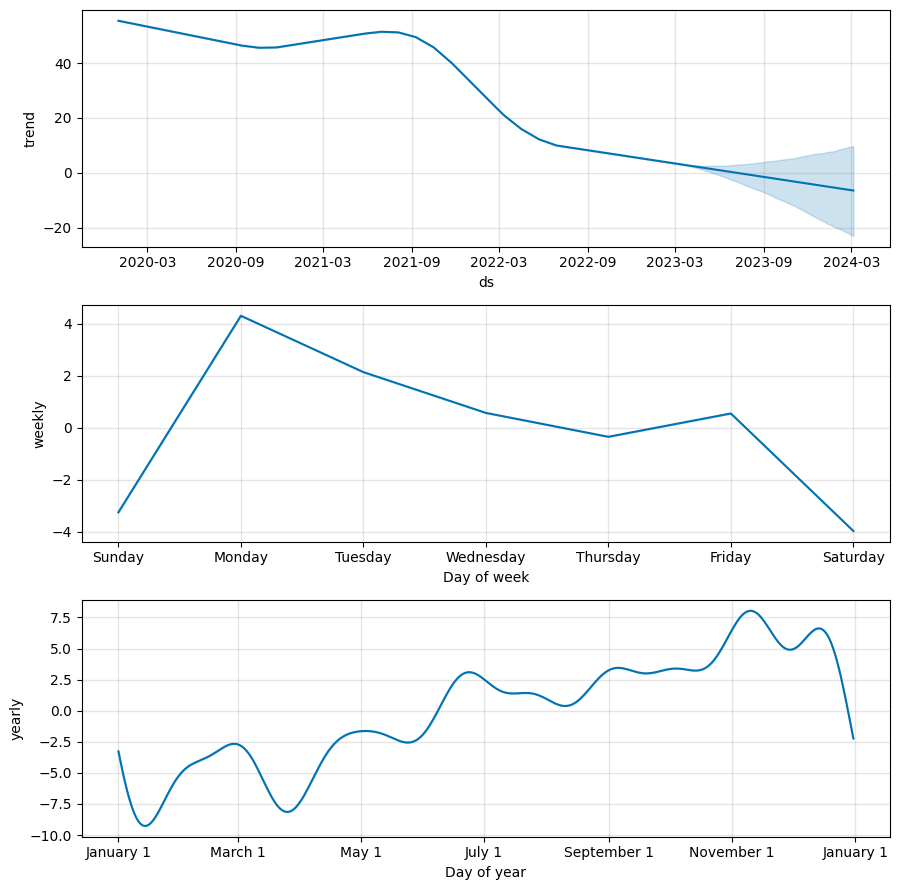

In [ ]:
fig2 = model.plot_components(forecast2)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R2
mse = mean_squared_error(df['y'], forecast2['yhat'][:len(df)])
r2 = r2_score(df['y'], forecast2['yhat'][:len(df)])

print("MSE: ", mse)
print("R2: ", r2)

MSE:  58.24800996946166
R2:  0.7047827534881763


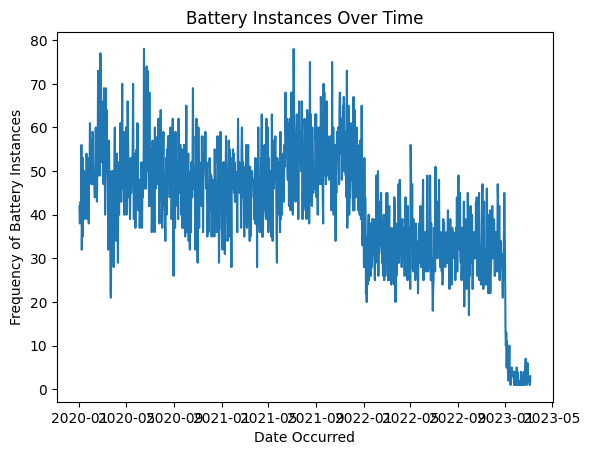

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


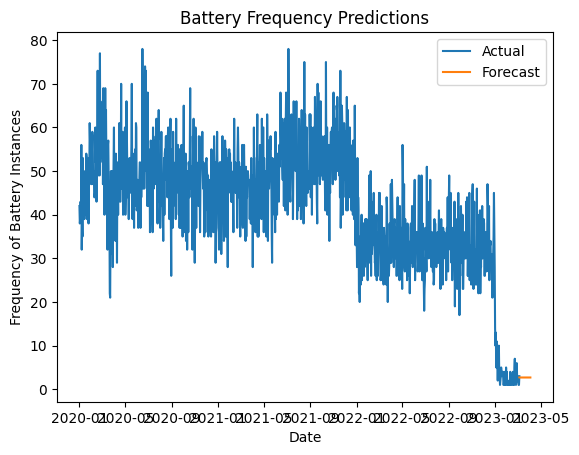

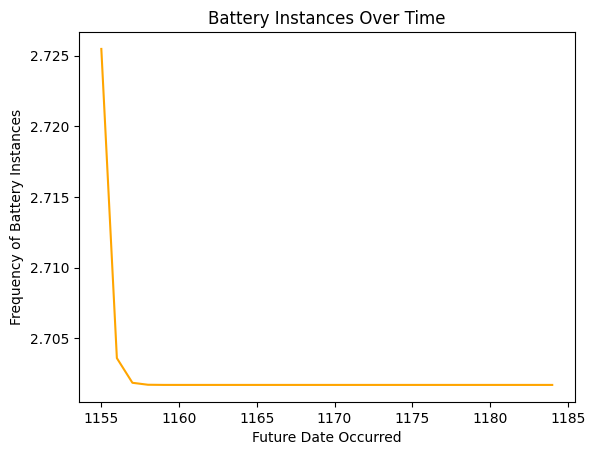

In [ ]:
# ARIMA MODEL 

#MLdf2['DATE OCC'] = pd.to_datetime(MLdf2['DATE OCC'])

# Set the date column as the index
#MLdf2.set_index('DATE OCC', inplace=True)

#MLdf2.index = pd.DatetimeIndex(MLdf2.index)

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters

# Load the dataset into a Pandas DataFrame

# Visualize the time series data
plt.plot(MLdf2)
plt.title('Battery Instances Over Time')
plt.xlabel('Date Occurred')
plt.ylabel('Frequency of Battery Instances')
plt.show()

# Fit an ARIMA model to the data
model = ARIMA(MLdf2, order=(1, 1, 1))
results = model.fit()

# Generate predictions for the next 30 days
predictions = pd.date_range(start=MLdf2.index[-1], periods=30, freq='D')
forecast = results.forecast(steps=30)

# Visualize the forecasted shoplisting frequencies
register_matplotlib_converters() # Required to fix date formatting issue
plt.plot(MLdf2.index, MLdf2['Frequency of Battery'], label='Actual')
plt.plot(predictions, forecast.values, label='Forecast')
plt.title('Battery Frequency Predictions')
plt.xlabel('Date')
plt.ylabel('Frequency of Battery Instances')
plt.legend()
plt.show()

#Visualize the forecast
plt.plot(forecast, color='orange')
plt.title('Battery Instances Over Time')
plt.xlabel('Future Date Occurred')
plt.ylabel('Frequency of Battery Instances')
plt.show()

In [ ]:
# Evaluating ARIMA Model
import statsmodels.api as sm

mse2 = np.mean((results.resid)**2)
print("Mean Squared Error (MSE): ", mse2)

# Calculate the R-squared value
TSS = ((MLdf2 - MLdf2.mean()) ** 2).sum()
RSS = (results.resid ** 2).sum()
R2 = 1 - (RSS / TSS)
print("R-squared (R2): ", R2)

Mean Squared Error (MSE):  4.076842563392407
R-squared (R2):  Frequency of Shoplifting Instances   -0.012256
dtype: float64
